# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


#### Data cleaning and preparation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

#### Convert the ‘date’, ‘day’, ‘month’, ‘year’, ‘Time’ & ‘hour’ to the datetime format

In [5]:
df["date"]= pd.to_datetime(df["Date"])

In [6]:
df["date"].dtype

dtype('<M8[ns]')

In [7]:
type(df["date"])

pandas.core.series.Series

In [8]:
df["date"] = pd.to_datetime(df["date"])

In [9]:
df["day"]= (df["date"]).dt.day

In [10]:
df["month"]= (df["date"]).dt.month

In [11]:
df["year"] = (df["date"]).dt.year

In [12]:
df["Time"] = pd.to_datetime(df["Time"])

In [13]:
df["Hour"] = (df["Time"]).dt.hour

In [14]:
df["Hour"].nunique()

11

The above figure is the number of unique hours in the data

In [15]:
df["Hour"].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int64)

In [16]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'date', 'day', 'month', 'year', 'Hour'],
      dtype='object')

#### Show the statistical information of the data

In [17]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858,8.693563,0.835254,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000


#### Check for missing values

In [18]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
date                       0
day                        0
month                      0
year                       0
Hour                       0
dtype: int64

The data has no missing values

In [19]:
categorical_columns = [cname for cname in df.columns if df[cname].dtype == "object"]

In [20]:
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Payment']

In [21]:
print("# unique values in Branch: {0}".format(len(df['Branch'].unique().tolist())))
print("# unique values in City: {0}".format(len(df['City'].unique().tolist())))
print("# unique values in Customer Type: {0}".format(len(df['Customer type'].unique().tolist())))
print("# unique values in Gender: {0}".format(len(df['Gender'].unique().tolist())))
print("# unique values in Product Line: {0}".format(len(df['Product line'].unique().tolist())))
print("# unique values in Payment: {0}".format(len(df['Payment'].unique().tolist())))

# unique values in Branch: 3
# unique values in City: 3
# unique values in Customer Type: 2
# unique values in Gender: 2
# unique values in Product Line: 6
# unique values in Payment: 3


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   object        
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [23]:
df["Sales"]= df["Quantity"]*df["Unit price"]

In [24]:
df["Sales"].dtype

dtype('float64')

 ### Question 1. What was the best month for sales. How much was earned that month?

In [25]:
df.groupby("month").Sales.sum()

month
1    110754.16
2     92589.88
3    104243.34
Name: Sales, dtype: float64

We can clearly see that there are only three months(January, Feburary, March) recorded in this dataset. The result output shows that January is the month that has the highest sales in 2019 with approximately $110,754. The next step is to visualize it to make it easier to understand.

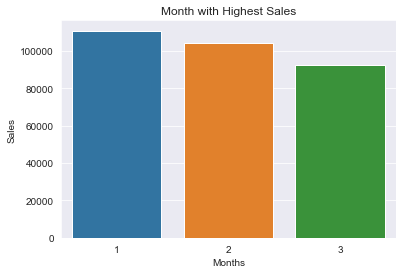

In [26]:
Months = df["month"].unique()
results1 = df.groupby("month").sum()
ax = sns.set_style("darkgrid")
ax = sns.barplot(x =Months, y=results1["Sales"], data = df);
ax.set(xlabel="Months", ylabel = "Sales")
plt.title("Month with Highest Sales")
plt.show()

## Question 2: Which city sold the most product?

In [27]:
df.groupby("City").sum()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour,Sales
City,,,,,,,,,,,,,
Mandalay,18478.88,1820,5057.0320,106197.6720,101140.64,1580.952381,5057.0320,2263.6,5068,665,670308,5029,101140.64
Naypyitaw,18567.76,1831,5265.1765,110568.7065,105303.53,1561.904762,5265.1765,2319.9,4956,640,662232,4894,105303.53
Yangon,18625.49,1859,5057.1605,106200.3705,101143.21,1619.047619,5057.1605,2389.2,5232,688,686460,4987,101143.21


In [28]:
df.groupby("City").Sales.sum()

City
Mandalay     101140.64
Naypyitaw    105303.53
Yangon       101143.21
Name: Sales, dtype: float64

If you look carefully you can see that Naypyitaw is the city with highest sold product of all cities with approximately $105,303.53.

In [29]:
df["City"].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

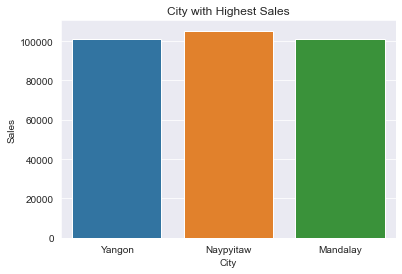

In [30]:
City = df["City"].unique()
results2 = df.groupby("City").sum()

ax = sns.set_style("darkgrid")
ax = sns.barplot(x =City, y=results2["Sales"], data = df)
ax.set(xlabel="City", ylabel = "Sales")
plt.title("City with Highest Sales")
plt.show()

## Question 3: What time should we display advertisements to maximize the likelihood of customers buying products?

In [31]:
df.groupby(["Hour"]).count()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,date,day,month,year,Sales
Hour,,,,,,,,,,,,,,,,,,,,,
10,101,101,101,101,101,101,101,101,101,101,...,101,101,101,101,101,101,101,101,101,101
11,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
12,89,89,89,89,89,89,89,89,89,89,...,89,89,89,89,89,89,89,89,89,89
13,103,103,103,103,103,103,103,103,103,103,...,103,103,103,103,103,103,103,103,103,103
14,83,83,83,83,83,83,83,83,83,83,...,83,83,83,83,83,83,83,83,83,83
15,102,102,102,102,102,102,102,102,102,102,...,102,102,102,102,102,102,102,102,102,102
16,77,77,77,77,77,77,77,77,77,77,...,77,77,77,77,77,77,77,77,77,77
17,74,74,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
18,93,93,93,93,93,93,93,93,93,93,...,93,93,93,93,93,93,93,93,93,93


In [32]:
df.groupby(["Hour"])["Quantity"].count()

Hour
10    101
11     90
12     89
13    103
14     83
15    102
16     77
17     74
18     93
19    113
20     75
Name: Quantity, dtype: int64

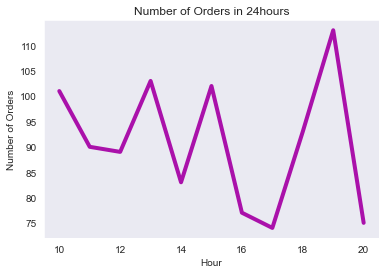

In [33]:
Hours = [Hour for Hour, df in df.groupby("Hour")]
results3 = df.groupby(["Hour"])["Quantity"].count()

ax = sns.set_style("darkgrid")
ax = sns.lineplot(x =Hours, y=results3, lw = 4, color = "#aa11aa")
ax.set(xlabel="Hour", ylabel = "Number of Orders")
plt.title("Number of Orders in 24hours")
plt.grid()
plt.show()

As you can see, there are approximately 4 peaks at the data. They are 10 (10AM) and 13 (1PM), and 15 (3PM), and 19 (7PM). It makes sense since most people shopping during the day. From this data, we can suggest to our bussiness partner to advertise their product right before 10AM, 1PM,3PM and 7PM. It could be 9.30 AM, 12.30 PM, 2.30 PM and/or 6.30 PM.

## Question 4: Payment Channel by City?

Text(0.5, 1.0, 'Top Payment Channel by City')

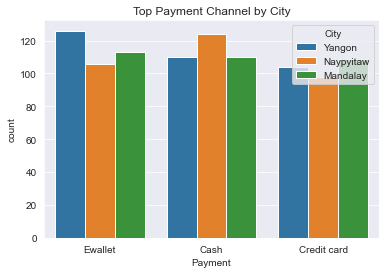

In [34]:
sns.countplot(x = "Payment", hue = "City", data = df).set_title("Top Payment Channel by City")

The highest record of Ewallet payment was made in Yangon city, while the the highest record of cash payment was in Naypyitaw  and in Madalay City, the most payment channel was through credit card.

## Question 5: What product line sold the most? Why do you think it did?

In [35]:
df.groupby(["Product line"]).sum()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour,Sales
Product line,,,,,,,,,,,,,
Electronic accessories,9103.77,971,2587.5015,54337.5315,51750.03,809.523810,2587.5015,1177.2,2759,348,343230,2548,51750.03
Fashion accessories,10173.35,902,2585.9950,54305.8950,51719.90,847.619048,2585.9950,1251.2,2717,346,359382,2680,51719.90
Food and beverages,9745.54,952,2673.5640,56144.8440,53471.28,828.571429,2673.5640,1237.7,2645,348,351306,2677,53471.28
Health and beauty,8337.88,854,2342.5590,49193.7390,46851.18,723.809524,2342.5590,1064.5,2373,312,306888,2260,46851.18
Home and lifestyle,8850.71,911,2564.8530,53861.9130,51297.06,761.904762,2564.8530,1094.0,2287,324,323040,2312,51297.06
Sports and travel,9460.88,920,2624.8965,55122.8265,52497.93,790.476190,2624.8965,1148.1,2475,315,335154,2433,52497.93


In [36]:
df.groupby(["Product line"])["Sales"].sum()

Product line
Electronic accessories    51750.03
Fashion accessories       51719.90
Food and beverages        53471.28
Health and beauty         46851.18
Home and lifestyle        51297.06
Sports and travel         52497.93
Name: Sales, dtype: float64

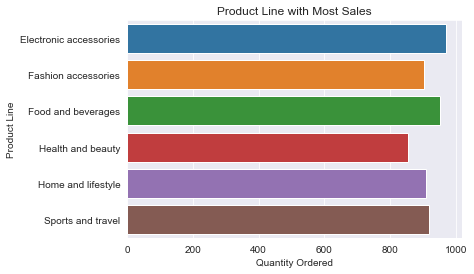

In [37]:
Product = [Product for Product, df in df.groupby("Product line")]
quantity_ordered = df.groupby(["Product line"])["Quantity"].sum()

ax = sns.set_style("darkgrid") 
ax = sns.barplot(x =quantity_ordered, y=Product, data = df)
ax.set(xlabel="Quantity Ordered", ylabel = "Product Line")
plt.title("Product Line with Most Sales")
plt.show()

Now we can see what product line sold the most, it’s Electronic accessories. We can also see that Electronic accessories, Food and beverages, Home and lifestyle, and Sports and travel are sold more than other products line. Why are they sold the most? The first impression is that they are cheaper than other products. As a data scientist, let’s prove this hypothesis. We could do it by overlaying the graph by their actual price and see if they have direct correlation.

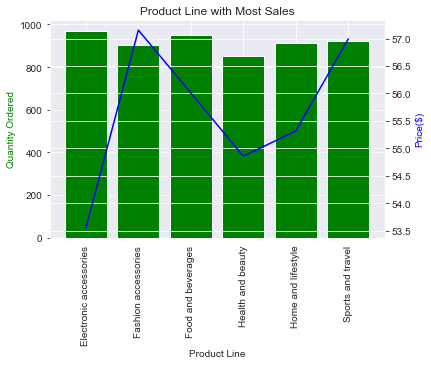

In [44]:
prices = df.groupby("Product line").mean()["Unit price"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(Product, quantity_ordered, color = "g")
ax2.plot(Product, prices, "b-")

ax1.set_xlabel("Product Line")
ax1.set_ylabel("Quantity Ordered", color = "g")
ax2.set_ylabel("Price($)", color = "b")
ax1.set_xticklabels(Product, rotation = "vertical", size = 10)
plt.title("Product Line with Most Sales")

plt.show()

Now we will interprate our results. Our hypothesis is true if the high sold product line have low price. From the graph we can see it is the case for Electorninc Accesories product line.

# CONCLUSION

1. What was the best month for sales? How much was earned that month?

The best month for sales is January. The company earned approximately $110,754.

2. What city sold the most product?

Naypyitaw is the city with the highest sales.


3. What time should we display advertisements to maximize likelihood of customer’s buying products?

We can suggest to advertise the products right before before 10AM, 1PM,3PM and 7PM. It could be 9.30 AM, 12.30 PM, 2.30 PM and/or 6.30 PM..


4. What is the best payment Channel by City?

The best payment channel for Yangon city is Ewallet. For Naypyitaw is cash payment and for Madalay City is credit card.

5. What product line sold the most? Why do you think it did?

Electorninc Accesories product line. Because it’s cheaper than other products and has high demand.